In [55]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import pylab

In [57]:
#--------------------------------------------------------------------------------------------------------
#Reads annotations and true skill ratings and creates a dictionary of len 4000 comprising only the images 
# with true skill ratings in my_dict
#--------------------------------------------------------------------------------------------------------

#Creating the my_dict dictionary from the file annotations.csv . Each dict entry has an image_name as the key and 
#a list of all the categories present in that image as the value
my_dict={}
with open('annotations.csv', 'r') as f:
    for line in f:
        items = line.split(',')
        key, values = items[0], items[1:]
        my_dict.setdefault(key, []).extend(values)
lista_all= my_dict.keys()

#Creating the my_dict dictionary from the file true_skill.csv . Each dict entry has an image_name as the key and 
#the true skill rating as the value
true_skill_dict = {}
with open('true_skill.csv', 'r') as f:
    for line in f:
        items = line.split(',')
        key, values = items[0], items[1:]
        true_skill_dict.setdefault(key, []).extend(values)
lista_subset = true_skill_dict.keys()

#Append trueskill ratings to my_dict
for each in my_dict:
    if each in true_skill_dict:
        my_dict[each].append(float(true_skill_dict[each][0]))
        
keys_list_c = [n for n in my_dict if n not in true_skill_dict]

#Deleting all keys from my_dict that are not common to both my_dict and true_skill_dict (i.e. images without a ts value)
for each in keys_to_delete:
    del my_dict[each]

#Creating a list containing all the ts ratings
ts_list = [n[1][-1] for n in my_dict.items()]

In [60]:
def n_images(low_cutoff,high_cutoff):
    new_dict = deepcopy(my_dict)
    boundaries = np.percentile(ts_list, [low_cutoff,high_cutoff]).tolist()
    for each in my_dict:
        if new_dict[each][-1] <= boundaries[0]:
            new_dict[each].append('low')
        elif new_dict[each][-1] >= boundaries[1]:
            new_dict[each].append('high')
        else:
            new_dict[each].append('medium')
    for each in new_dict:
        print new_dict[each]

In [63]:
n_images()

[' person', '', '', '', '', '\n', 27.33404946795403, 'high']
[' pottedplant', ' car', ' bicycle', '', '', '\n', 22.159683125421964, 'high']
[' bird', '', '', '', '', '\n', 22.514193762807114, 'high']
[' person', ' bottle', '', '', '', '\n', 23.881254349577723, 'high']
[' bird', '', '', '', '', '\n', 15.929198978425086, 'medium']
[' person', '', '', '', '', '\n', 22.789849733974634, 'high']
[' boat', ' cow', '', '', '', '\n', 29.659407124334734, 'high']
[' tvmonitor', ' chair', '', '', '', '\n', 22.895043347166332, 'high']
[' person', '', '', '', '', '\n', 29.726402067515583, 'high']
[' person', ' dog', '', '', '', '\n', 32.23604822129471, 'high']
[' person', ' train', '', '', '', '\n', 19.449014773390623, 'high']
[' bus', ' person', '', '', '', '\n', 31.55697493659705, 'high']
[' horse', '', '', '', '', '\n', 19.156547420300026, 'high']
[' person', '', '', '', '', '\n', 20.325858104825315, 'high']
[' person', ' motorbike', '', '', '', '\n', 31.64894973403629, 'high']
[' car', '', '', '

[' person', '', '', '', '', '\n', 26.284935949973367, 'high']
[' tvmonitor', '', '', '', '', '\n', 29.284231988958208, 'high']
[' person', ' motorbike', '', '', '', '\n', 23.164093022864954, 'high']
[' dog', '', '', '', '', '\n', 20.230415157929183, 'high']
[' cat', '', '', '', '', '\n', 13.015820424707677, 'low']
[' person', ' train', '', '', '', '\n', 28.57475746598321, 'high']
[' sheep', '', '', '', '', '\n', 11.813987872567097, 'low']
[' car', ' horse', '', '', '', '\n', 26.32035054993093, 'high']
[' person', '', '', '', '', '\n', 30.978975743044376, 'high']
[' car', '', '', '', '', '\n', 25.22652108637616, 'high']
[' cow', '', '', '', '', '\n', 7.538094799561837, 'low']
[' person', ' chair', ' bottle', '', '', '\n', 25.80012772327921, 'high']
[' tvmonitor', '', '', '', '', '\n', 30.634709014672016, 'high']
[' pottedplant', ' sofa', ' chair', '', '', '\n', 27.865368736457114, 'high']
[' sheep', '', '', '', '', '\n', 26.097074714969022, 'high']
[' person', ' dog', '', '', '', '\n', 

In [4]:
df = pd.DataFrame(my_dict) 
df = df.T
df.reset_index(inplace=True)
df.columns =['image name','Cat.1','Cat.2','Cat.3','Cat.4','Cat.5','Cat.6','True_Skill','Load']

df['True_Skill'] = df['True_Skill'].astype(float)
#df[7] = df[7].astype(str)
#df = df[df.Load != 'medium']
df['True_Skill'].describe()


count    4000.000000
mean       24.944497
std         5.487111
min         6.950419
25%        21.260576
50%        24.996375
75%        28.625333
max        42.592147
Name: True_Skill, dtype: float64

In [5]:
categories =['person', 'bird', 'cat', 'cow', 'dog', 'horse', 'sheep', 'aeroplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike', 'train', 'bottle', 'chair', 'table', 'plant', 'sofa', 'monitor']
load_level = ['low','high']
person_low= []
bird_low= []
cat_low= []
cow_low= []
dog_low= []
horse_low= []
sheep_low= []
aeroplane_low= []
bicycle_low= []
boat_low= []
bus_low= []
car_low= []
motorbike_low= []
train_low= []
bottle_low= []
chair_low= []
dining_table_low= []
potted_plant_low= []
sofa_low= []
tv_monitor_low= []

person_high= []
bird_high= []
cat_high= []
cow_high= []
dog_high= []
horse_high= []
sheep_high= []
aeroplane_high= []
bicycle_high= []
boat_high= []
bus_high= []
car_high= []
motorbike_high= []
train_high= []
bottle_high= []
chair_high= []
dining_table_high= []
potted_plant_high= []
sofa_high= []
tv_monitor_high= []

#container=[person_low,bird_low,cat_low,cow_low,dog_low,horse_low,sheep_low,aeroplane_low,bicycle_low,boat_low,
           #bus_low,car_low,motorbike_low,train_low,bottle_low,chair_low,dining_table_low,potted_plant_low,sofa_low,
           #tv_monitor_low,person_high,bird_high,cat_high,cow_high,dog_high,horse_high,sheep_high,aeroplane_high,
           #bicycle_high,boat_high,bus_high,car_high,motorbike_high,train_high,bottle_high,chair_high,dining_table_high,
           #potted_plant_high,sofa_high,tv_monitor_high
#]
container_low=[]
container_high = []
container_medium=[]
#container_low =[person_low,bird_low,cat_low,cow_low,dog_low,horse_low,sheep_low,aeroplane_low,bicycle_low,boat_low,
#          bus_low,car_low,motorbike_low,train_low,bottle_low,chair_low,dining_table_low,potted_plant_low,sofa_low,
#         tv_monitor_low]
#container_high=[person_high,bird_high,cat_high,cow_high,dog_high,horse_high,sheep_high,aeroplane_high,
#            bicycle_high,boat_high,bus_high,car_high,motorbike_high,train_high,bottle_high,chair_high,dining_table_high,
#           potted_plant_high,sofa_high,tv_monitor_high]

In [6]:
for i in range(len(categories)):
        counter = 0
        for each in my_dict:
            if categories[i] in my_dict[each][0] and 'low' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][1] and 'low' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][2] and 'low' in my_dict[each]:
                counter = counter +1         
            if categories[i] in my_dict[each][3] and 'low' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][4] and 'low' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][5] and 'low' in my_dict[each]:
                counter = counter +1
        container_low.append(counter)

In [7]:
for i in range(len(categories)):
        counter = 0
        for each in my_dict:
            if categories[i] in my_dict[each][0] and 'high' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][1] and 'high' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][2] and 'high' in my_dict[each]:
                counter = counter +1         
            if categories[i] in my_dict[each][3] and 'high' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][4] and 'high' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][5] and 'high' in my_dict[each]:
                counter = counter +1
        container_high.append(counter)

In [8]:
for i in range(len(categories)):
        counter = 0
        for each in my_dict:
            if categories[i] in my_dict[each][0] and 'medium' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][1] and 'medium' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][2] and 'medium' in my_dict[each]:
                counter = counter +1         
            if categories[i] in my_dict[each][3] and 'medium' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][4] and 'medium' in my_dict[each]:
                counter = counter +1
            if categories[i] in my_dict[each][5] and 'medium' in my_dict[each]:
                counter = counter +1
        container_medium.append(counter)

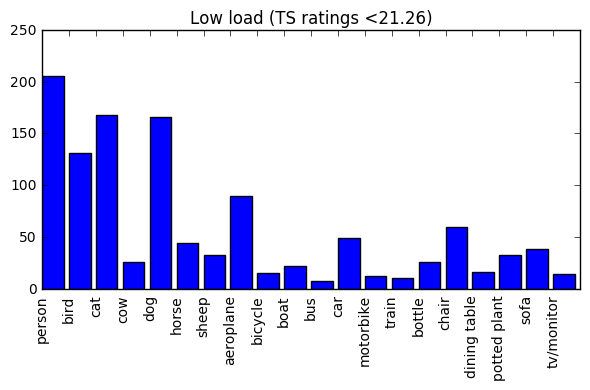

In [9]:

categories =['person', 'bird', 'cat', 'cow', 'dog', 'horse', 'sheep', 'aeroplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike', 'train', 'bottle', 'chair', 'dining table', 'potted plant', 'sofa', 'tv/monitor']
container_low
plt.title('Low load (TS ratings <21.26)')
plt.bar(range(len(container_low)), container_low,)
plt.xticks(range(len(container_low)), categories, rotation=90)
plt.tight_layout()
pylab.savefig('low_load.pdf')
plt.show()

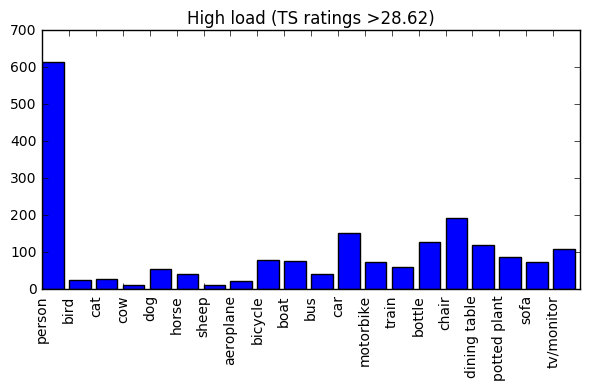

In [10]:
categories =['person', 'bird', 'cat', 'cow', 'dog', 'horse', 'sheep', 'aeroplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike', 'train', 'bottle', 'chair', 'dining table', 'potted plant', 'sofa', 'tv/monitor']
container_low
plt.title('High load (TS ratings >28.62)')
plt.bar(range(len(container_high)), container_high,) #align='center'
plt.xticks(range(len(container_high)), categories, rotation=90)
plt.tight_layout()
pylab.savefig('high_load.pdf')
plt.show()

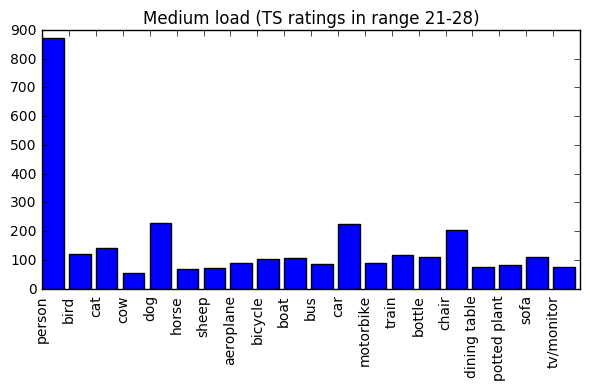

In [11]:
categories =['person', 'bird', 'cat', 'cow', 'dog', 'horse', 'sheep', 'aeroplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike', 'train', 'bottle', 'chair', 'dining table', 'potted plant', 'sofa', 'tv/monitor']
container_low
plt.title('Medium load (TS ratings in range 21-28)')
plt.bar(range(len(container_medium)), container_medium,) #align='center'
plt.xticks(range(len(container_medium)), categories, rotation=90)
#ax.get_xaxis().get_major_formatter().set_useOffset(False)
#ax = plt.gca()
#ax.ticklabel_format(useOffset=False)
plt.tight_layout()
pylab.savefig('medium_load.pdf')
plt.show()


In [12]:
#high_frequency = dict(zip(container_high, categories))
#print high_frequency
#low_frequency = dict(zip(container_low, categories))
#print low_frequency

In [13]:
high_frequency = dict(zip(categories,container_high))
print high_frequency
low_frequency = dict(zip(categories,container_low))
print low_frequency

{'sheep': 11, 'bottle': 126, 'horse': 41, 'tv/monitor': 107, 'bicycle': 78, 'motorbike': 73, 'cow': 10, 'dining table': 119, 'bus': 39, 'potted plant': 86, 'dog': 52, 'cat': 26, 'person': 613, 'train': 58, 'aeroplane': 22, 'car': 150, 'chair': 192, 'sofa': 71, 'bird': 23, 'boat': 75}
{'sheep': 33, 'bottle': 26, 'horse': 44, 'tv/monitor': 14, 'bicycle': 15, 'motorbike': 12, 'cow': 26, 'dining table': 16, 'bus': 7, 'potted plant': 33, 'dog': 166, 'cat': 168, 'person': 206, 'train': 10, 'aeroplane': 90, 'car': 49, 'chair': 60, 'sofa': 38, 'bird': 131, 'boat': 22}


In [14]:
#names_low =[]
#for each in low_frequency:
#    if low_frequency[each] >= 10000:
#        names_low.append(low_frequency[each])
#print names_low
#print len(names_low)

In [15]:
names_high = [key for (key, value) in high_frequency.items() if value >=20]
names_low = [key for (key, value) in low_frequency.items() if value >=20]
print names_low, len(names_low)
print names_high, len(names_high)

['sheep', 'bottle', 'horse', 'cow', 'potted plant', 'dog', 'cat', 'person', 'aeroplane', 'car', 'chair', 'sofa', 'bird', 'boat'] 14
['bottle', 'horse', 'tv/monitor', 'bicycle', 'motorbike', 'dining table', 'bus', 'potted plant', 'dog', 'cat', 'person', 'train', 'aeroplane', 'car', 'chair', 'sofa', 'bird', 'boat'] 18


In [16]:
surviving =[]
for each in names_low:
    if each in names_high:
        surviving.append(each)
print surviving
print len(surviving)

['bottle', 'horse', 'potted plant', 'dog', 'cat', 'person', 'aeroplane', 'car', 'chair', 'sofa', 'bird', 'boat']
12


In [31]:
df = pd.DataFrame.from_dict(my_dict)
df = df.T
df = df[df[7] != 'medium']
df.head()

df.to_csv('my_dict.csv')